# Models and Evaluation

In [30]:
import pandas as pd
import numpy as np
from IPython.display import display

data = pd.read_csv('data_processed/complete/data_selected.csv')

display(data.head())

,loan_id,loan_payments,has_disponent,mean_balance,min_balance,monthly_diff,crime rate growth,has_card,status
0,5314,8033,False,12250.000000,1100.0,6700,-0.001909,False,-1
1,5316,4610,False,52083.859459,700.0,14733,-0.002094,False,1
2,6863,2118,False,30060.954167,800.0,-6859,0.000539,False,1
3,5325,2939,False,41297.480000,1000.0,-11054,-0.001739,False,1
4,7240,4579,False,57188.211111,600.0,-30531,-0.001179,False,1


In [31]:
def get_features(df):
    return df.drop('status', axis=1)
def get_target(df):
    return df['status']

results = {}

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

stratified_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [33]:
from sklearn.model_selection import cross_validate


def cross_validation(name, model, df=data, cv=stratified_kfold):
    scores = cross_validate(model, get_features(df), get_target(df), scoring='roc_auc', cv=cv)['test_score']
    results[name] = scores
    print(name, scores.mean(), scores.std())

### Algorithms

In [34]:
SMOTE = True

In [35]:
from sklearn.tree import DecisionTreeClassifier
cross_validation('DT',
    DecisionTreeClassifier(),
)

DT 0.6756488443330547 0.04686413471195229


In [36]:
from sklearn.neighbors import KNeighborsClassifier
cross_validation('KNN',
    KNeighborsClassifier(),
)

KNN 0.7256538336582196 0.06975257925402964


In [46]:
from sklearn.neural_network import MLPClassifier
cross_validation('MLP',
    MLPClassifier(),
)

MLP 0.605456929360438 0.10552399065767257


In [38]:
from sklearn.naive_bayes import GaussianNB
cross_validation('GNB',
    GaussianNB(),
)

GNB 0.7919340016708438 0.07214974184475721


In [39]:
from sklearn.svm import SVC
cross_validation('SVM',
    SVC(probability=True),
)

SVM 0.7292743432655713 0.05536362509987242


In [40]:
from sklearn.linear_model import LogisticRegression
cross_validation('LR',
    LogisticRegression(),
)

LR 0.7594360902255637 0.06870682911856076


In [41]:
from sklearn.ensemble import RandomForestClassifier
cross_validation('RF',
    RandomForestClassifier(),
)

RF 0.79086860670194 0.04866796067031937


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
cross_validation('GB',
    GradientBoostingClassifier(),
)

GB 0.8055697113153254 0.07034326608264374


/home/rikenunes8/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/rikenunes8/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


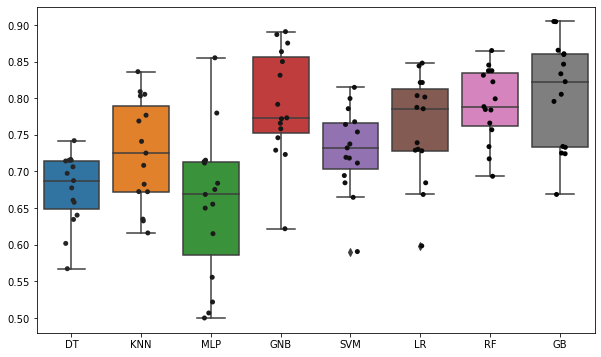

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sb.boxplot(data=pd.DataFrame(results))
sb.stripplot(data=pd.DataFrame(results), color='black')
plt.show()